<h1>WORDS, WORDS, WORDS...</h1>

<h2>The Beatles Songs Analysis Project</h2>

Here I conduct the comparison of general statistical information about word numbers in titles and lyrics, taking into consideration such parameters as release year and originality.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

# load data
df = pd.read_json('data.json')

# configure graphics 
plt.style.use('ggplot')
plt.figure()
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

<Figure size 432x288 with 0 Axes>

Here I am going to analyze two songs features: number of words in titles and number of words in lyrics. Please note that this data have not been adjusted in any way: all articles and prepositions are present, and <a href="https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions">contractions</a> are counted as one word. Some songs contain words in brackets in lyrics, these are counted too. The numbers were already counted after downloading the data (see the <a href="https://github.com/dpol2000/tbsa/blob/master/get_data.py">script</a>) and are present in the file.

First, let's analyze the number of words in songs titles in the same fashion as we have done with songs lengths in <a href="http://www.hrutr.net/entries/tbsa-step-1-second-by-second-length-above-all">Step 1</a>. In contrast to length, this data has a very short range. A plotbox goes first.

Text(0,0.5,'Number of words')

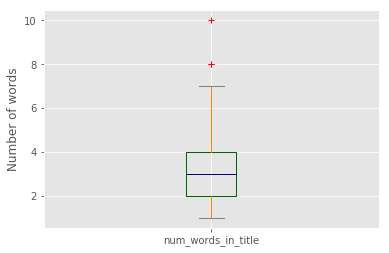

In [2]:
df['num_words_in_title'].plot.box(color=color, sym='r+').set_ylabel('Number of words')

The median number is three. Now let's use a histogram to see the frequency of each number, and look at the common statistic information.

Text(0,0.5,'Number of songs')

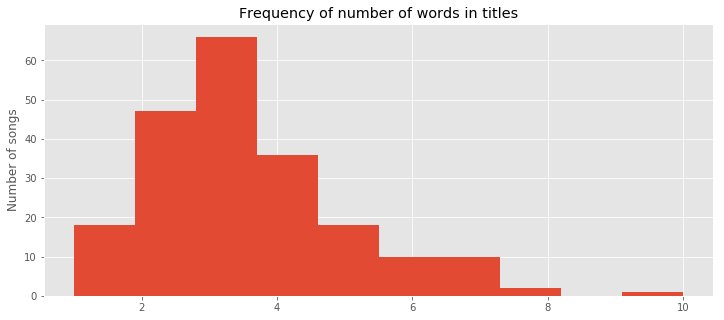

In [3]:
# histogram
plt.title('Frequency of number of words in titles')
df['num_words_in_title'].hist(figsize=(12, 5)).set_ylabel('Number of songs')

But absolute number of songs in each category doesn't say much; let's count relative figures.

In [4]:
# number of words in titles in proportion to number of songs
df_rlt = df['num_words_in_title'].value_counts() / df['num_words_in_title'].describe()['count'] * 100

Text(0,0.5,'Number of songs, %')

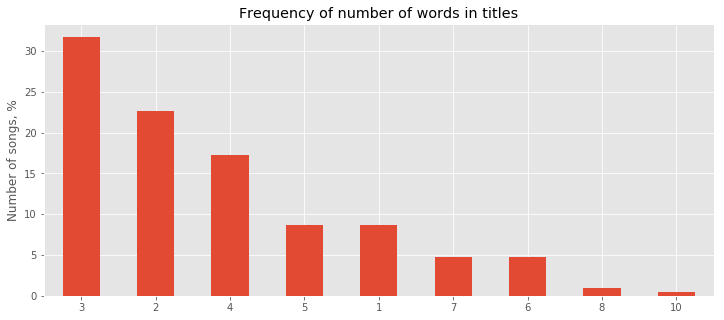

In [5]:
df_rlt.plot(kind="bar", figsize=(12, 5), rot=0, 
                               title="Frequency of number of words in titles").set_ylabel('Number of songs, %')

So we can see that the songs with the most common title length comprise about one third of all songs. The songs with 2, 3, and 4 words in their titles comprise in common more than two thirds:

In [6]:
# percentage of the songs with 2,3, or 4 words in their titles
df_rlt.values[0] + df_rlt.values[1] + df_rlt.values[2]

71.634615384615387

There are several songs with the minimal title length (one word, of course), but which song has the maximum number (it is 10)? And from which album?

In [7]:
# the song with a title of maximum length
df[df['num_words_in_title']==df['num_words_in_title'].describe()['max']].title.iat[0]

"Everybody's Got Something To Hide Except Me And My Monkey"

In [8]:
# the song with maximum title length's album name
df[df['num_words_in_title']==df['num_words_in_title'].describe()['max']].album_title.iat[0]

'The Beatles (The White Album)'

What can be seen from the time series?

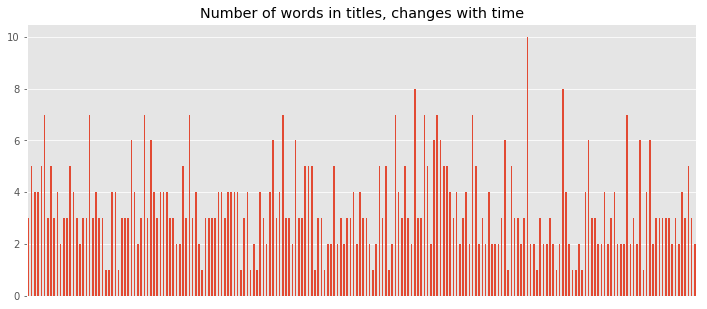

In [9]:
df_sorted = df.sort_values(by='year')
df_sorted['num_words_in_title'].plot(kind='bar', figsize=(12, 5), 
                                  title="Number of words in titles, changes with time").xaxis.set_visible(False)

We see that the number of words follow a similar pattern in the first half; there are titles of different length every year, but the longest doesn't exceed 7. And then, in the second half, titles with 8 and 10 words appear (titles with one word title appear in the both halves). So the variance is clearly higher in the second half. Let's look at the means, medians and variance by year.

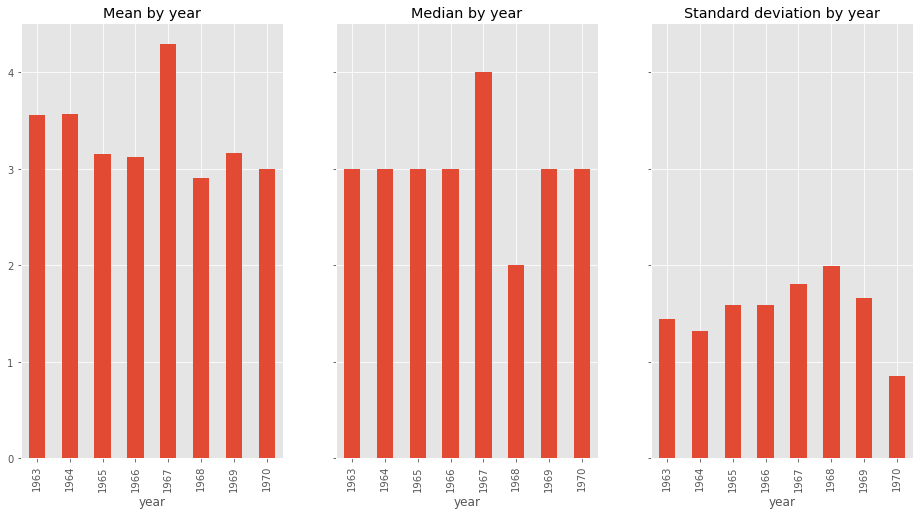

In [10]:
df_by_year = df_sorted.groupby('year')
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('Mean by year')
axs[1].set_title('Median by year')
axs[2].set_title('Standard deviation by year')
df_by_year['num_words_in_title'].aggregate(np.mean).plot(kind='bar', ax=axs[0], figsize=(16, 8))
df_by_year['num_words_in_title'].aggregate(np.median).plot(kind='bar', ax=axs[1])
df_by_year['num_words_in_title'].aggregate(np.std).plot(kind='bar', ax=axs[2])

We can see that mean and median are almost the same, with the peak in 1967. Overall the mean title length is three words, ascending to four in 1967 (with median falling to two in 1968).

No surprise that the variance is higher in the second half. It has its peak in 1968. But the lowest point also lies in the second half, in 1970. So it's generally rises, reaches its peak and then falls down. Let's check if the second half is really less uniform!

In [11]:
df_63_66 = df[df['year'].isin(range(1963, 1967))]
df_67_70 = df[df['year'].isin(range(1967, 1971))]

In [12]:
df_63_66['num_words_in_title'].std()

1.4664828953587772

In [13]:
df_67_70['num_words_in_title'].std()

1.8147620736130166

So, the second half is really less uniform in the number of words in titles as the variance of the second half is higher.

Now let's examine the number of words in lyrics.

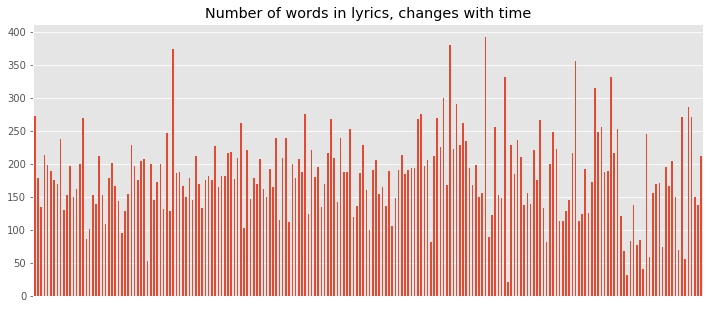

In [14]:
df_sorted['num_words_in_lyrics'].plot(kind='bar', figsize=(12, 5), 
                                   title="Number of words in lyrics, changes with time").xaxis.set_visible(False)

It seems that the second half again has higher variance.

In [15]:
df_63_66['num_words_in_lyrics'].std()

46.382372568960491

In [16]:
df_67_70['num_words_in_lyrics'].std()

78.203827973299482

So the impression from the picture was right. Let's look at general statistical parameters and plots now.

In [17]:
df_sorted['num_words_in_lyrics'].describe()

count    208.000000
mean     182.115385
std       62.557461
min       21.000000
25%      145.000000
50%      181.500000
75%      213.750000
max      392.000000
Name: num_words_in_lyrics, dtype: float64

So the mean number of words in lyrics is 182. Let's plot mean, median and standard deviation by year.

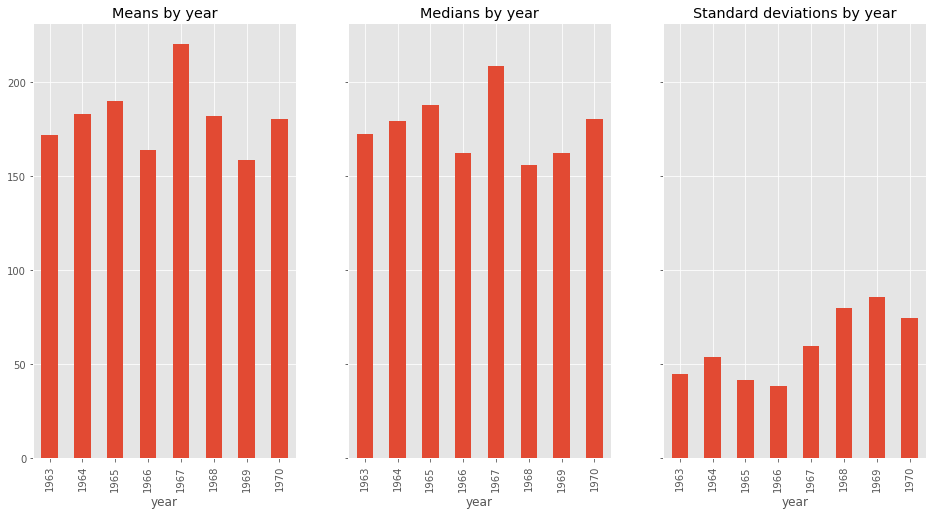

In [18]:
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('Means by year')
axs[1].set_title('Medians by year')
axs[2].set_title('Standard deviations by year')
df_by_year['num_words_in_lyrics'].aggregate(np.mean).plot(kind='bar', figsize=(16, 8), ax=axs[0])
df_by_year['num_words_in_lyrics'].aggregate(np.median).plot(kind='bar', ax=axs[1])
df_by_year['num_words_in_lyrics'].aggregate(np.std).plot(kind='bar', ax=axs[2])

Again variance is higher in the second half, but this time its peak is in 1969.

We see that the average number of words is more or less the same, with significant rising in 1967 (again).

Now let's find the song with minimal words number.

In [19]:
# the song with minimal words number
df[df['num_words_in_lyrics']==df['num_words_in_lyrics'].min()].title.iat[0]

'Wild Honey Pie'

And the album?

In [20]:
# the album of the song with minimal words number
df[df['num_words_in_lyrics']==df['num_words_in_lyrics'].min()].album_title.iat[0]

'The Beatles (The White Album)'

The White Album again! What about the biggest number of words?

In [21]:
# # the song with maximal words number
df[df['num_words_in_lyrics']==df['num_words_in_lyrics'].max()].title.iat[0]

'Hey Jude'

This song is not from the White Album, it's a single, but is from the same period.

So, the song with the shortest number of words is <i>Wild Honey Pie</i> (21 words), the longest is <i>Hey Jude</i> with 392. 

Let's look at cover versions now, both number of title words and number of lyrics words.

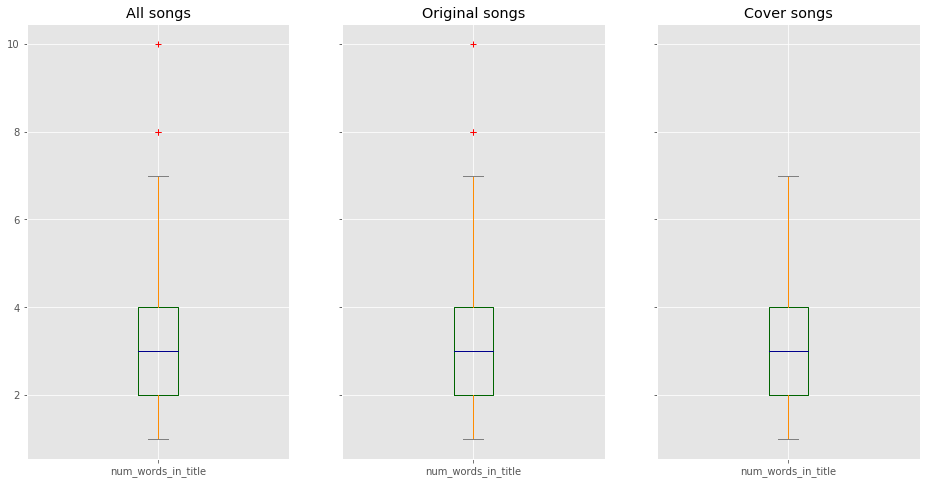

In [22]:
df_cover = df[df.cover==True]
df_orig = df[df.cover==False]

fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('All songs')
axs[1].set_title('Original songs')
axs[2].set_title('Cover songs')
df['num_words_in_title'].plot.box(color=color, sym='r+', ax=axs[0], figsize=(16, 8))
df_orig['num_words_in_title'].plot.box(color=color, sym='r+', ax=axs[1])
df_cover['num_words_in_title'].plot.box(color=color, sym='r+', ax=axs[2])

We see that covers don't differ from other songs in average title length (it's 3). The only evident difference is that they don't have any outliers and therefore are more uniform.

What about words number in lyrics?

In [23]:
# mean number of words in lyrics for covers
df_cover['num_words_in_lyrics'].mean()

182.25

In [24]:
# mean number of words in lyrics for originals
df_orig['num_words_in_lyrics'].mean()

182.09782608695653

In [25]:
# median number of words in lyrics for covers
df_cover['num_words_in_lyrics'].median()

180.5

In [26]:
# median number of words in lyrics for originals
df_orig['num_words_in_lyrics'].median()

181.5

We see that both means and medians in covers and originals are rather close. Let's look at the plots!

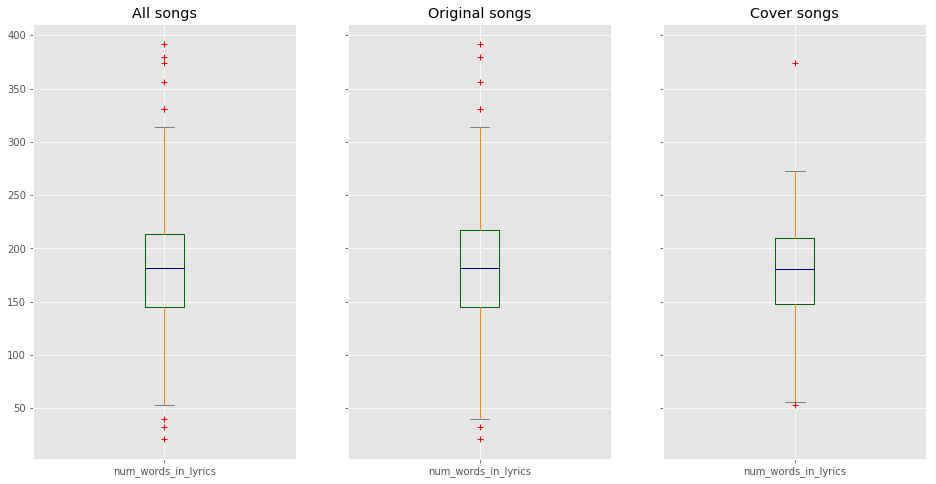

In [27]:
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('All songs')
axs[1].set_title('Original songs')
axs[2].set_title('Cover songs')
df['num_words_in_lyrics'].plot.box(color=color, sym='r+', ax=axs[0], figsize=(16, 8))
df_orig['num_words_in_lyrics'].plot.box(color=color, sym='r+', ax=axs[1])
df_cover['num_words_in_lyrics'].plot.box(color=color, sym='r+', ax=axs[2])

The covers have significantly less outliers. But what about the variance?

In [28]:
# standard deviation of number of words in lyrics for covers
df_cover['num_words_in_lyrics'].std()

68.530063222044319

In [29]:
# standard deviation of number of words in lyrics for originals
df_orig['num_words_in_lyrics'].std()

61.938813415096476

We see that the covers' variance is actually higher!

Now let's find the outliers in covers that exist, and to which albums they belong.

In [30]:
# cover song with minimal number of words in lyrics' title
df_cover[df_cover.num_words_in_lyrics==df_cover.num_words_in_lyrics.min()].title.iat[0]

'Words Of Love'

In [31]:
# cover song with minimal number of words in lyrics' album
df_cover[df_cover.num_words_in_lyrics==df_cover.num_words_in_lyrics.min()].album_title.iat[0]

'Beatles For Sale'

In [32]:
# cover song with maximal number of words in lyrics' title
df_cover[df_cover.num_words_in_lyrics==df_cover.num_words_in_lyrics.max()].title.iat[0]

'Rock And Roll Music'

In [33]:
# cover song with maximal number of words in lyrics' title
df_cover[df_cover.num_words_in_lyrics==df_cover.num_words_in_lyrics.max()].album_title.iat[0]

'Beatles For Sale'

So, the both outliers are on the same album! 

Finally, let's plot the data in the coordinates of number of words in lyrics against length in seconds, and assign different color to covers and non-covers.

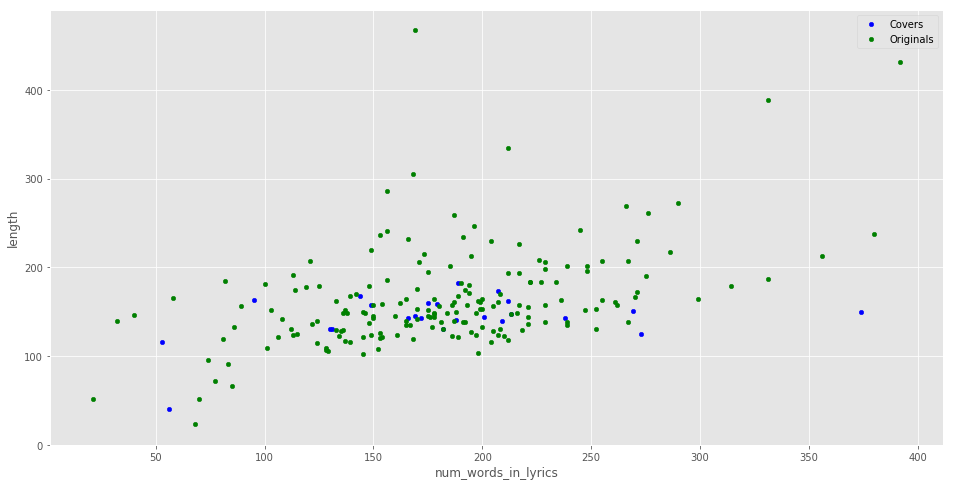

In [34]:
ax = df[df.cover==True].plot.scatter(x='num_words_in_lyrics', y='length', figsize=(16, 8), 
                                     color='Blue', label='Covers')
df[df.cover==False].plot.scatter(x='num_words_in_lyrics', y='length', 
                                 color='Green', label='Originals', ax=ax)

We see that there is more or less linear dependency. It seems natural; the more words in the song, the more time you need to sing them. Let's find the Pearson's coefficient.

In [35]:
# the Pearson's coefficient for all songs
np.corrcoef(df['num_words_in_lyrics'], df['length'])[0][1]

0.46053203057113823

In [36]:
# the Pearson's coefficient for originals
np.corrcoef(df_orig['num_words_in_lyrics'], df_orig['length'])[0][1]

0.48003454226402592

In [37]:
# the Pearson's coefficient for covers
np.corrcoef(df_cover['num_words_in_lyrics'], df_cover['length'])[0][1]

0.38476973740444542

So the Pearson's coefficient is 0.46, and it's not that low. But it's not that high either, so the true dependency is somewhat more complicated than just linear one.

For originals alone it's almost the same (0.48), but for covers it's even lower! It's not a surprise, though. Just take a look at the picture: covers are rather uniform in length. Even those with longer lyrics have almost the same length as ones with short lyrics.

Also it's evident that the covers in general actually do not differ much from the original compositions. At least, they are not linearly separable.

Finally, let's find the most typical Beatles song(s) in terms of all three features, as we did in the pervious step with length only.

In [38]:
median_by_length = df[df.length==df.length.median()].title
median_by_title = df[df.num_words_in_title==df.num_words_in_title.median()].title
median_by_lyrics = df[df.num_words_in_lyrics==df.num_words_in_lyrics.median()].title

In [39]:
# indices of songs combining median length, median number of words in title and median number of words in lyrics
median_by_length.index & median_by_title.index & median_by_lyrics.index

Int64Index([], dtype='int64')

It's a pity, but there is no song which would combine all three medians. Still, there are songs that combine two of them: 

In [40]:
median_length_title = median_by_length.index & median_by_title.index
median_lyrics_title = median_by_lyrics.index & median_by_title.index
median_lyrics_length = median_by_lyrics.index & median_by_length.index

In [41]:
# titles of songs combining median length and number of words in title
df.loc[median_length_title].title

37      For You Blue
188    Hold Me Tight
Name: title, dtype: object

In [42]:
# titles of songs with median number of words in title and number of words in lyrics
df.loc[median_lyrics_title].title

Series([], Name: title, dtype: object)

In [43]:
# titles of songs with median length and number of words in lyrics
df.loc[median_lyrics_length].title

Series([], Name: title, dtype: object)

So, there are two songs combining median length and number of words in title: <i>For You Blue</i> and <i>Hold Me Tight</i>. There are no songs with median number of words in title and number of words in lyrics, and no songs combining median length and number of words in lyrics.

<h2>Conclusion</h2>

The average song title consists of three words. Such songs comprise about one third of all songs. The minimum lies at 1 and the maximum at 10 (<i>Everybody's Got Something To Hide Except Me And My Monkey</i> from the <b>White Album</b>,  1968). The number of words in titles is more diverse in the second period (1967-1970). The covers have generally the same title lengths as the original songs, but they don't have outliers.

The average song contains 182 words. The number of words in lyrics is again more diverse in the second period. The longest songs in average are in 1967, and the year with the highest variance of number of words is 1969. Still, the shortest (<i>Wild Honey Pie</i>, 21 words) song was released in 1968 and the longest (<i>Hey Jude</i>, 392 words) song in 1967. The covers don't differ much from the original songs, they have lower range but higher variance.

There are no songs combining median length, median number of words in title and median number of words in lyrics. Still, there are two songs combining median length and number of words in title: <i>Hold Me Tight</i> (1963) and <i>For You Blue</i> (1970).